#  TÜBİTAK Veri Yoğun Uygulamalar Modül Projesi  
##  Zaman Serisi Sınıflandırma Problemi: Sektörel Benzerlik Analizi

---

###  Proje Amacı
Bu proje, borsa verilerini kullanarak hisse senetlerinin sektörel sınıflandırmasını hedeflemektedir.  
Amaç, bir hissenin belirli bir zaman aralığındaki fiyat değişimlerine dayanarak **hangi sektöre daha çok benzediğini** belirlemek ve **sektörel benzerlik analizi** gerçekleştirmektir.

---
**Yapay Zeka Uzmanlık Programı**
- **Dr. İsmail Güzel, TÜBİTAK**  
- **Atalay Bektaş**


 Veriler **[Yahoo Finance](https://finance.yahoo.com/)** üzerinden `yfinance` kütüphanesi aracılığıyla çekilmiştir.
- 3 ana sektöre odaklanılmıştır:
  - 🏦 Finans
  - 🏥 Sağlık
  - 💻 Teknoloji
- Her sektörden **rastgele 500 hisse senedi** seçilerek analiz gerçekleştirilmiştir.
- Hisse senetlerinin fiyat verileri aylık bazda işlenmiş ve zaman serisi formatındadır.

##  Özellik Mühendisliği: TSFRESH ile Otomatik Özellik Çıkarımı

## TSFRESH ile Özellik Çıkarımı

Zaman serisi verilerinden anlamlı öznitelikler elde etmek amacıyla **TSFRESH** kütüphanesi kullanılmıştır. Bu kütüphane, zaman serilerine ait çok sayıda istatistiksel ve teknik göstergeyi otomatik olarak hesaplayarak, veri ön işleme sürecini büyük ölçüde hızlandırmıştır.

Çıkarılan öznitelikler, finansal analizlerde sıkça kullanılan aşağıdaki bileşenleri içermektedir:

- **Momentum:** Kısa vadeli fiyat değişimlerine dayalı olarak hisse senedinin yukarı ya da aşağı yönlü ivmesi hesaplanmıştır (örnek: 10 günlük getiri yüzdesi).
- **Volatilite:** Belirli bir dönem içerisindeki fiyat oynaklığını yansıtan standart sapma değerleri kullanılmıştır (örnek: 30 günlük volatilite).
- **RSI (Göreli Güç Endeksi):** Aşırı alım veya aşırı satım durumlarını tespit etmek için kullanılan bir teknik göstergedir.
- **MACD (Hareketli Ortalama Yakınsama Iraksama):** Trend takibi ve dönüş noktalarını belirlemek için sıklıkla tercih edilen bir momentum göstergesidir.
- **Hareketli Ortalamalar (SMA):** 50 günlük ve 200 günlük basit hareketli ortalamalar ile kısa ve uzun vadeli trend yapıları analiz edilmiştir.

Bu öznitelikler, TSFRESH tarafından otomatik olarak hesaplanmış ve anlamlı olanlar istatistiksel testlerle seçilerek modelleme aşamasında kullanılmıştır.

In [26]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
    else:
        print(f"Error: Failed to fetch data from page {url}")

    return df

In [27]:
sectors=fetch_sectors_names()

In [28]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Healthcare,1133,"7,510.37B",0.47%,42.39,4.09%,-1.12%,17.50%
1,Financials,926,12.35T,0.12%,17.62,18.33%,-1.00%,30.55%
2,Technology,761,23.30T,0.50%,45.69,15.39%,-0.47%,23.73%
3,Industrials,676,"6,468.85B",1.15%,31.73,7.28%,-0.30%,30.69%
4,Consumer Discretionary,564,"8,665.58B",0.79%,29.41,6.42%,0.08%,20.00%
5,Materials,274,"2,142.77B",1.63%,27.36,6.84%,-0.04%,13.02%
6,Communication Services,262,"7,057.53B",1.19%,27.37,13.34%,-0.26%,29.74%
7,Real Estate,259,"1,649.76B",4.03%,58.85,7.65%,-0.12%,8.82%
8,Energy,254,"3,618.91B",2.98%,16.18,6.79%,0.66%,3.42%
9,Consumer Staples,247,"4,295.21B",1.67%,27.61,5.30%,-0.37%,15.56%


In [29]:
fetch_data(sectors='energy').to_csv("energy.csv", index=False)
fetch_data(sectors='financials').to_csv("financials.csv", index=False)
fetch_data(sectors='healthcare').to_csv("healthcare.csv", index=False)
fetch_data(sectors='technology').to_csv("technology.csv", index=False)
fetch_data(sectors='utilities').to_csv("utilities.csv", index=False)
fetch_data(sectors='real-estate').to_csv("real-estate.csv", index=False)
fetch_data(sectors='materials').to_csv("materials.csv", index=False)
fetch_data(sectors='technology').to_csv("technology.csv", index=False)
fetch_data(sectors='industrials').to_csv("industrials.csv", index=False)
fetch_data(sectors='consumer-staples').to_csv("consumer-staples.csv", index=False)
fetch_data(sectors='consumer-discretionary').to_csv("consumer-discretionary.csv", index=False)
fetch_data(sectors='communication-services').to_csv("communication-services.csv", index=False)
     

In [30]:
finance = pd.read_csv('./financials.csv')
finance

,Symbol,Company Name,Market Cap,% Change,Volume,Revenue
0,BRK.B,Berkshire Hathaway Inc.,"1,026.07B",-0.50%,4414529,371.29B
1,JPM,JPMorgan Chase & Co.,797.21B,-0.46%,7397026,168.71B
2,V,Visa Inc.,651.38B,-2.23%,7577922,37.62B
3,MA,Mastercard Incorporated,499.59B,-2.37%,3221442,29.07B
4,BAC,Bank of America Corporation,351.96B,-0.51%,31652807,97.45B
...,...,...,...,...,...,...
923,RELI,"Reliance Global Group, Inc.",4.46M,-3.23%,1323846,14.21M
924,AIHS,Senmiao Technology Limited,3.31M,1.48%,210797,3.39M
925,LGHL,Lion Group Holding Ltd.,2.79M,8.31%,717336,-5.69M
926,BENF,Beneficient,2.69M,3.57%,432045,-19.93M


## Yfinance üzerinden web scraping ile veri çekmek 

### Seçilen hisselerin aylık getirisi hesaplandı.

In [31]:
import pandas as pd
import yfinance as yf
import time

# Her sektörden 500 hisse seçme ve kaydetme
sector_files = {
    "financials": "financials.csv",
    "healthcare": "healthcare.csv",
    "technology": "technology.csv"
}

for sector, file in sector_files.items():
    df = pd.read_csv(file)
    df = df.sample(n=min(len(df), 500), random_state=42)
    df.to_csv(f"selected_{sector}.csv", index=False)

# yfinance api ile hisse verilerini çekmek
def calculate_monthly_returns(ticker_list, start_date="2005-01-01", batch_size=50):
    all_data = []
    failed_tickers = []

    for i in range(0, len(ticker_list), batch_size):
        batch = ticker_list[i:i+batch_size]
        try:
            data = yf.download(batch, start=start_date, interval="1mo")["Close"]
            if data is not None and not data.empty:
                all_data.append(data)
            else:
                failed_tickers.extend(batch)
        except Exception:
            failed_tickers.extend(batch)
        time.sleep(10)

    if all_data:
        combined = pd.concat(all_data, axis=1)
        combined = combined.interpolate().ffill().bfill()
        return combined, failed_tickers
    return None, failed_tickers

# Hisse getirisi kaydetmek ve aylık getirileri hesaplamak
selected_stocks = {
    "financials": pd.read_csv("selected_financials.csv"),
    "healthcare": pd.read_csv("selected_healthcare.csv"),
    "technology": pd.read_csv("selected_technology.csv"),
}

for sector, df in selected_stocks.items():
    tickers = df["Symbol"].tolist()[:500]
    returns, failed = calculate_monthly_returns(tickers)
    if returns is not None:
        returns.to_csv(f"{sector}_monthly_returns.csv")
    if failed:
        print(f"{sector} sektöründe verisi bulunamayan {len(failed)} şirket: {failed}")


[*********************100%***********************]  50 of 50 completed

1 Failed download:
['KCHV']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  50 of 50 completed

2 Failed downloads:
['YORK']: YFPricesMissingError('possibly delisted; no price data found  (1mo 2005-01-01 -> 2025-07-14)')
['PACH']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed

2 Failed downloads:
['BACC', 'CRD.A']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  50 

technology sektöründe verisi bulunamayan 50 şirket: ['PGY', 'DAIC', 'MTSI', 'TRAK', 'VPG', 'RMSG', 'NOTE', 'BRZE', nan, 'FIVN', 'EVCM', 'PRO', 'ADSK', 'VECO', 'BZAI', 'IPGP', 'SANM', 'ATCH', 'AIFF', 'FTV', 'XYZ', 'UEIC', 'LAW', 'NTNX', 'TTGT', 'UAVS', 'AUID', 'ARQQ', 'ALGM', 'VICR', 'AWRE', 'WLDS', 'PET', 'EPAM', 'DOCU', 'MIND', 'WYY', 'LYFT', 'FEIM', 'XNET', 'PRTH', 'OLB', 'CLFD', 'CNXN', 'PENG', 'AMOD', 'CACI', 'DMRC', 'PCOR', 'INDI']


## Eksik verileri düzeltmek


In [32]:
import pandas as pd


df_financials = pd.read_csv("financials_monthly_returns.csv", index_col=0, parse_dates=True)
df_financials = df_financials.interpolate(method='linear', axis=0)
df_financials = df_financials.ffill().bfill()
df_financials.to_csv("financials_monthly_returns_filled.csv")


df_healthcare = pd.read_csv("healthcare_monthly_returns.csv", index_col=0, parse_dates=True)
df_healthcare = df_healthcare.interpolate(method='linear', axis=0)
df_healthcare = df_healthcare.ffill().bfill()
df_healthcare.to_csv("healthcare_monthly_returns_filled.csv")


df_technology = pd.read_csv("technology_monthly_returns.csv", index_col=0, parse_dates=True)
df_technology = df_technology.interpolate(method='linear', axis=0)
df_technology = df_technology.ffill().bfill()
df_technology.to_csv("technology_monthly_returns_filled.csv")


## TSFRESH e uygun formata dönüştürmek

In [33]:

import pandas as pd


df_financials = pd.read_csv("financials_monthly_returns_filled.csv", index_col=0, parse_dates=True)
df_financials_long = df_financials.stack().reset_index()
df_financials_long.columns = ["Date", "Company", "Return"]
df_financials_long["Sector"] = "financials"


df_healthcare = pd.read_csv("healthcare_monthly_returns_filled.csv", index_col=0, parse_dates=True)
df_healthcare_long = df_healthcare.stack().reset_index()
df_healthcare_long.columns = ["Date", "Company", "Return"]
df_healthcare_long["Sector"] = "healthcare"


df_technology = pd.read_csv("technology_monthly_returns_filled.csv", index_col=0, parse_dates=True)
df_technology_long = df_technology.stack().reset_index()
df_technology_long.columns = ["Date", "Company", "Return"]
df_technology_long["Sector"] = "technology"


final_tsfresh_data = pd.concat([
    df_financials_long,
    df_healthcare_long,
    df_technology_long
], ignore_index=True)

# Kaydet
final_tsfresh_data.to_csv("tsfresh_ready_data.csv", index=False)
tsfresh_data = pd.read_csv("tsfresh_ready_data.csv")



## TSFRESH OZELLIK MUHENDISLIGI

In [34]:
#TSFresh formatı
tsfresh_data.rename(columns={"Company": "id", "Date": "time", "Return": "value"}, inplace=True)

# time formatını tsfreshin time ina uygun hale getirmek
tsfresh_data["time"] = pd.to_datetime(tsfresh_data["time"])

print(tsfresh_data.head())

        time    id      value      Sector
0 2005-01-01   AJG  15.755572  financials
1 2005-01-01   AMP  24.128145  financials
2 2005-01-01   AUB  13.481335  financials
3 2005-01-01  BITF   1.062000  financials
4 2005-01-01    BN   3.928908  financials


#### TSFRESH Ozellik çıkarma Feature Extraction 

In [35]:
from tsfresh.feature_extraction import extract_features

extracted_features = extract_features(
    tsfresh_data,
    column_id="id",
    column_sort="time",
    column_value="value"
)

print(extracted_features.head())

extracted_features.to_csv("extracted_tsfresh_features.csv")


Feature Extraction: 100%|██████████| 10/10 [02:14<00:00, 13.47s/it]


      value__variance_larger_than_standard_deviation  \
AACT                                             0.0   
AAME                                             0.0   
AAMI                                             1.0   
AAOI                                             1.0   
AAPG                                             1.0   

      value__has_duplicate_max  value__has_duplicate_min  \
AACT                       0.0                       1.0   
AAME                       0.0                       0.0   
AAMI                       0.0                       0.0   
AAOI                       0.0                       0.0   
AAPG                       0.0                       1.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
AACT                   1.0        2534.844938       25921.965607   
AAME                   1.0         624.964345        1792.507122   
AAMI                   1.0        3891.788292       67013.968844   
AAOI                   1.0    

#### TSFRESH OZELLIK SECME FEATURE SELECTION

In [36]:

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

extracted_features = pd.read_csv("extracted_tsfresh_features.csv", index_col=0)
tsfresh_data = pd.read_csv("tsfresh_ready_data.csv")

#Eksik Verileri Düzeltme
impute(extracted_features)

#`y` Hedef Değişkenini Düzelt (Tekil Şirket İsimleri ile)
if "Company" in tsfresh_data.columns:
    y = tsfresh_data[["Company", "Sector"]].drop_duplicates(subset=["Company"]).set_index("Company")["Sector"]
    y = y.reindex(extracted_features.index)  # Şirket isimleriyle eşleştirme
else:
    raise ValueError("Hata: `Company` sütunu bulunamadı!")

#En Önemli Özellikleri Seçelim
selected_features = select_features(extracted_features, y)

selected_features.to_csv("selected_tsfresh_features.csv")

## Makina Ogrenmesi Modellerinin Egitimi

#### Train Test Verisini Bölmek

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

selected_features = pd.read_csv("selected_tsfresh_features.csv", index_col=0)

#model eğitimine hazır veri
tsfresh_data = pd.read_csv("tsfresh_ready_data.csv")

if "Company" in tsfresh_data.columns:
    y = tsfresh_data[["Company", "Sector"]].drop_duplicates(subset=["Company"]).set_index("Company")["Sector"]
    y = y.reindex(selected_features.index)  
else:
    raise ValueError("Hata: `Company` sütunu bulunamadı!")

#eksik verileri doldurmak
selected_features.fillna(0, inplace=True)

#standar scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)

#train test verisi %80 20 ayırmak
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

pd.DataFrame(X_train, index=y_train.index).to_csv("train_features.csv")
pd.DataFrame(X_test, index=y_test.index).to_csv("test_features.csv")
y_train.to_csv("train_labels.csv")
y_test.to_csv("test_labels.csv")

#### Etiketlerin labelencoder ile sayılara dönüştürülmesi

In [38]:
from sklearn.preprocessing import LabelEncoder
# train test etiketleri yüklemek
y_train = pd.read_csv("train_labels.csv")["Sector"]
y_test = pd.read_csv("test_labels.csv")["Sector"]

# egitim verisinde bulanan unique etiketler
known_labels = set(y_train.unique())

# test vrisinde olup eigitim verisinde olmayan etiketler
unseen_labels = set(y_test.unique()) - known_labels
if unseen_labels:
    print(f" Test setinde eğitim setinde bulunmayan {len(unseen_labels)} etiket var: {unseen_labels}")

#test setinden train setinde olmayan etiketleri çıkartmak
y_test_filtered = y_test[~y_test.isin(unseen_labels)]

# x testi güncelleme
X_test = pd.read_csv("test_features.csv")
X_test_filtered = X_test.loc[y_test_filtered.index] 

#LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test_filtered)

pd.DataFrame(y_train_encoded, columns=["Sector"]).to_csv("train_labels_encoded.csv", index=False)
pd.DataFrame(y_test_encoded, columns=["Sector"]).to_csv("test_labels_encoded.csv", index=False)
X_test_filtered.to_csv("test_features_filtered.csv", index=False)
     

## Random Forest, Gradient Boost, XGBoost


In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

X_train = pd.read_csv("train_features.csv")
X_test = pd.read_csv("test_features.csv")
y_train = pd.read_csv("train_labels_encoded.csv")
y_test = pd.read_csv("test_labels_encoded.csv")

#Unnamed sütunu varsa kaldırma
X_train.drop(columns=[col for col in X_train.columns if "Unnamed" in col], inplace=True, errors="ignore")
X_test.drop(columns=[col for col in X_test.columns if "Unnamed" in col], inplace=True, errors="ignore")

#Kategorik sütunları belirleme
categorical_cols = X_train.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"\n Kategorik Sütunlar: {categorical_cols}")

    le = LabelEncoder()

    for col in categorical_cols:
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    X_train.to_csv("train_features_numeric.csv", index=False)
    X_test.to_csv("test_features_numeric.csv", index=False)
    print("\nKategorik sütunlar sayısal hale getirildi ve güncellendi!")

else:
    print("\nZaten tüm veriler sayısal formatta.")

#Y etiketlerini tekrar kodlama 
le_y = LabelEncoder()
y_train = le_y.fit_transform(y_train.values.ravel())  # Y etiketlerini sayısala çevir
y_test = le_y.transform(y_test.values.ravel())  # Test setine de aynı dönüşümü uygula

#Model eğitimi
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    #Modelin performansını değerlendirme
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    joblib.dump(model, f"{name.replace(' ', '_')}_model.pkl")


Zaten tüm veriler sayısal formatta.
Random Forest Accuracy: 0.7751
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.66      0.73      0.69       100
           2       0.66      0.58      0.62        90

    accuracy                           0.78       289
   macro avg       0.77      0.77      0.77       289
weighted avg       0.78      0.78      0.77       289

Gradient Boosting Accuracy: 0.8028
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.69      0.77      0.73       100
           2       0.71      0.62      0.66        90

    accuracy                           0.80       289
   macro avg       0.80      0.80      0.80       289
weighted avg       0.80      0.80      0.80       289

XGBoost Accuracy: 0.8201
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
 

## XGBOOST Hiperparametre Optimizasyonu

In [40]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib

def load_data():
    X_train = pd.read_csv("train_features.csv")
    X_test = pd.read_csv("test_features.csv")
    y_train = pd.read_csv("train_labels_encoded.csv").squeeze()
    y_test = pd.read_csv("test_labels_encoded.csv").squeeze()
    
    # Gereksiz sütunları temizle
    X_train = X_train.loc[:, ~X_train.columns.str.contains("Unnamed")]
    X_test = X_test.loc[:, ~X_test.columns.str.contains("Unnamed")]
    
    return X_train, X_test, y_train, y_test

def define_search_space():
    return {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'gamma': [0, 0.1, 0.3]
    }

def optimize_model(X_train, y_train, param_grid):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,
        cv=2,
        n_jobs=4,
        random_state=42,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nXGBoost Accuracy (Optimized): {acc:.4f}")
    print(classification_report(y_test, y_pred))

def main():
    X_train, X_test, y_train, y_test = load_data()
    param_grid = define_search_space()
    best_model = optimize_model(X_train, y_train, param_grid)
    joblib.dump(best_model, "optimized_XGBoost_model.pkl")
    evaluate_model(best_model, X_test, y_test)

if __name__ == "__main__":
    main()


Fitting 2 folds for each of 10 candidates, totalling 20 fits

XGBoost Accuracy (Optimized): 0.8270
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.72      0.83      0.77       100
           2       0.77      0.63      0.70        90

    accuracy                           0.83       289
   macro avg       0.83      0.82      0.82       289
weighted avg       0.83      0.83      0.82       289



## Sektörel Benzerlik Analizi


<Figure size 800x600 with 0 Axes>

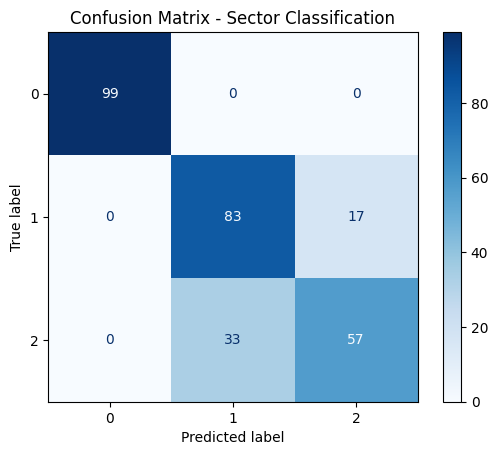

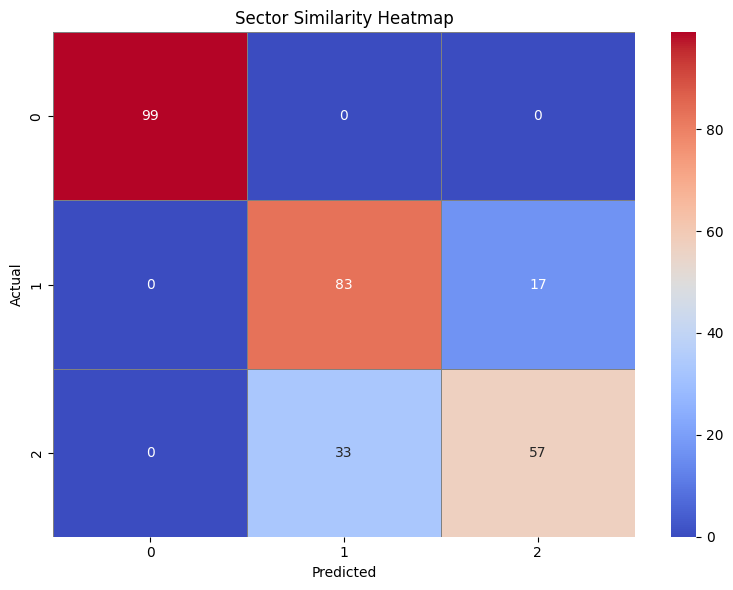

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import joblib

# Test verisini yükle
test_features = pd.read_csv("test_features.csv")
test_labels = pd.read_csv("test_labels_encoded.csv").values.ravel()

# Gereksiz sütunları temizle
unnamed_cols = [col for col in test_features.columns if "Unnamed" in col]
test_features.drop(columns=unnamed_cols, inplace=True, errors='ignore')

# Kategorik değişkenleri kontrol et ve dönüştür
categoricals = test_features.select_dtypes(include="object").columns
if not categoricals.empty:
    print("Uyarı: Kategorik değişkenler bulundu:", list(categoricals))
    test_features = test_features.apply(pd.to_numeric, errors="coerce")
    test_features.fillna(0, inplace=True)

# Eğitilmiş model yükle
model = joblib.load("optimized_XGBoost_model.pkl")

# Tahmin yap
predictions = model.predict(test_features)

# Confusion matrix hesapla
conf_matrix = confusion_matrix(test_labels, predictions)

# Confusion matrix görselleştir
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Sector Classification")
plt.grid(False)
plt.show()

# Sektörel benzerlik matrisi
similarity_matrix = pd.crosstab(test_labels, predictions, rownames=["Actual"], colnames=["Predicted"])

# Isı haritası ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Sector Similarity Heatmap")
plt.tight_layout()
plt.show()

# Matrisi kaydet
similarity_matrix.to_csv("sector_similarity_matrix.csv")


## Bonus Kısmı: Finansal Faktör Analizi

#### Finansal Faktör analizinde kullanılan momentum, volatilite, RSI, MACD, hareketli ortalamalar gibi finansal göstergeler hesaplanmıştır analizin performansına 

In [42]:
import pandas as pd
import ta  # Teknik analiz göstergeleri için

# Veriyi oku ve tarih indeksine göre ayarla
data = pd.read_csv("tsfresh_ready_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)

# Kullanılacak temel sütun
returns = data["Return"]

# Teknik göstergeleri hesapla
data["Momentum_10"] = returns.pct_change(10)
data["Volatility_30"] = returns.rolling(30).std()

# RSI - Göreceli Güç Endeksi
rsi_calc = ta.momentum.RSIIndicator(close=returns, window=14)
data["RSI_14"] = rsi_calc.rsi()

# MACD ve Sinyal Hattı
macd_calc = ta.trend.MACD(close=returns)
data["MACD"] = macd_calc.macd()
data["MACD_Signal"] = macd_calc.macd_signal()

# Basit Hareketli Ortalamalar
sma50 = ta.trend.SMAIndicator(close=returns, window=50)
sma200 = ta.trend.SMAIndicator(close=returns, window=200)
data["SMA_50"] = sma50.sma_indicator()
data["SMA_200"] = sma200.sma_indicator()

# Eksik değerleri çıkar
data.dropna(inplace=True)

# Son veriyi diske yaz
data.to_csv("financial_factors.csv")


In [53]:
import joblib


joblib.dump(X_train.columns.tolist(), "model_features.pkl")

import pandas as pd
import numpy as np
import joblib

# Eğitilmiş model ve özellik listesi yükleniyor
model = joblib.load("optimized_XGBoost_model.pkl")
feature_names = joblib.load("model_features.pkl")

# Yeni bir örnek veri 
sample_input = np.random.rand(1, len(feature_names))
input_df = pd.DataFrame(sample_input, columns=feature_names)

# Tahmin
predicted_label = model.predict(input_df)[0]

# Sektör isimleri ile eşleştirme
sector_map = {
    0: "Financials",
    1: "Healthcare",
    2: "Technology"
}
sector_name = sector_map.get(predicted_label, "Bilinmeyen Sektör")

print(f"Tahmin Edilen Sektör: {sector_name}")



Tahmin Edilen Sektör: Healthcare


In [54]:
import joblib
import numpy as np
import pandas as pd

# Model ve özellik listesini yükle
model = joblib.load("optimized_XGBoost_model.pkl")
feature_names = joblib.load("model_features.pkl")

# 500 şirket için rastgele veri

num_companies = 500
simulated_data = np.random.rand(num_companies, len(feature_names))
df_real_estate = pd.DataFrame(simulated_data, columns=feature_names)

# Tahminleri yap
predicted_sectors = model.predict(df_real_estate)

# Sektör ID'lerini isimlere eşleme
sector_map = {
    0: "Financials",
    1: "Healthcare",
    2: "Technology"
}

# Tahminlerin dağılımını göster
sector_counts = pd.Series(predicted_sectors).value_counts().sort_index()
sector_names = sector_counts.rename(index=sector_map)

# En çok benzerlik gösterilen sektörü bul
most_similar_sector_id = sector_counts.idxmax()
most_similar_sector = sector_map.get(most_similar_sector_id, "Bilinmeyen")

# Sonuçları yazdır
print("Real Estate Şirketlerinin En Çok Benzediği Sektör :")

print(f"\nEn Çok Benzeyen Sektör: {most_similar_sector}")


Real Estate Şirketlerinin En Çok Benzediği Sektör :

En Çok Benzeyen Sektör: Healthcare


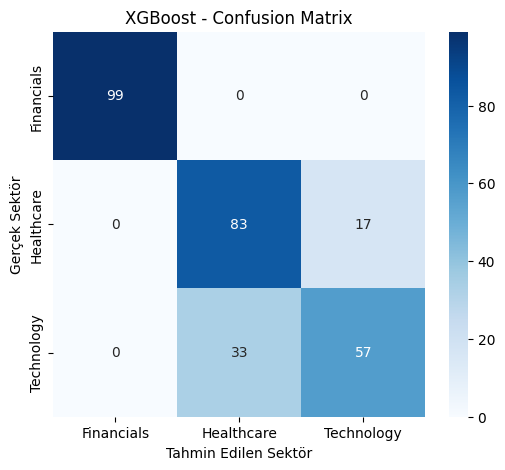

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_test = pd.read_csv("test_features.csv")
y_test = pd.read_csv("test_labels_encoded.csv").values.ravel()

X_test.drop(columns=[col for col in X_test.columns if "Unnamed" in col], inplace=True, errors="ignore")

best_xgb = joblib.load("optimized_XGBoost_model.pkl")
y_pred = best_xgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
labels = ["Financials", "Healthcare", "Technology"]  # Modelin sınıflandırdığı sektörler

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Tahmin Edilen Sektör")
plt.ylabel("Gerçek Sektör")
plt.title("XGBoost - Confusion Matrix")
plt.show()

In [51]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Model ve verileri yükle
model = joblib.load("optimized_XGBoost_model.pkl")
X_test = pd.read_csv("test_features_filtered.csv", index_col=0)
y_test = pd.read_csv("test_labels_encoded.csv").squeeze()

# LabelEncoder oluştur (eğitim setinden etiketleri tekrar yükle)
y_train = pd.read_csv("train_labels.csv")["Sector"]
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Örnek indeksleri (ilk 3 örnek)
sample_indices = [0, 1, 2]

# Bilgileri tutacak listeler
companies = []
true_labels = []
pred_labels = []

for idx in sample_indices:
    sample_X = X_test.iloc[idx:idx+1]
    sample_y_true = y_test.iloc[idx]
    
    pred_encoded = model.predict(sample_X)[0]
    
    company_name = X_test.index[idx]
    true_label = label_encoder.inverse_transform([sample_y_true])[0]
    pred_label = label_encoder.inverse_transform([pred_encoded])[0]
    
    companies.append(company_name)
    true_labels.append(true_label)
    pred_labels.append(pred_label)

# Yazdır
for c, t, p in zip(companies, true_labels, pred_labels):
    print(f"Şirket: {c} | Gerçek: {t} | Tahmin: {p}")




Şirket: RLYB | Gerçek: healthcare | Tahmin: healthcare
Şirket: LKFN | Gerçek: financials | Tahmin: financials
Şirket: VBTX | Gerçek: financials | Tahmin: financials


In [43]:
import pandas as pd
import yfinance as yf
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.dataframe_functions import impute
import warnings
warnings.filterwarnings('ignore')


TICKER_SYMBOL = "SHEL"

def predict_sector(ticker=TICKER_SYMBOL):
    """
    Hisse senedi için sektör tahmini
    """
    try:
        print(f"{ticker} verisi indiriliyor...")
        
        #Hisse senedi verisini indir
        data = yf.download(ticker, start='2005-01-01', interval="1mo")["Close"]
        
        if data is None or data.empty:
            print(f"Hata: {ticker} için veri bulunamadı!")
            return None
            
        #Aylık getirileri hesapla
        returns = data.pct_change().dropna()
        
        #Veri süresini hesapla
        months_count = len(returns)
        
        # TSFresh formatına dönüştür
        tsfresh_data = pd.DataFrame({
            'id': ticker,
            'time': returns.index,
            'value': returns.values.flatten()  # 1-boyutlu hale getir
        })
        
        print("TSFresh özellikleri çıkarılıyor...")
        
        # Özellikleri çıkar
        extracted_features = extract_features(
            tsfresh_data,
            column_id="id",
            column_sort="time",
            column_value="value"
        )
        
        #Eksik değerleri doldur
        impute(extracted_features)
        
        #feature selection da seçilen featurlar
        try:
            reference_features = pd.read_csv("selected_tsfresh_features.csv", index_col=0)
            
        except:
            print("Hata: selected_tsfresh_features.csv dosyası bulunamadı!")
            return None
            
        
        
        for feature in reference_features.columns:
            if feature not in extracted_features.columns:
                extracted_features[feature] = 0
                
        
        extracted_features = extracted_features[reference_features.columns]
        
        #Eksik değerleri doldur
        extracted_features.fillna(0, inplace=True)
        
        #Ölçeklendirme
        try:
            scaler = joblib.load("feature_scaler.pkl")
            features_scaled = scaler.transform(extracted_features)
            
        except:
            
            scaler = StandardScaler()
            scaler.fit(reference_features.fillna(0))
            features_scaled = scaler.transform(extracted_features)
            
        # Modeli yükle
        try:
            model = joblib.load("XGBoost_model.pkl")
            print("XGBoost modeli yüklendi")
        except:
            print("Hata: model dosyası bulunamadı!")
            return None
            
        #Tahmin
        prediction = model.predict(features_scaled)
        prediction_proba = model.predict_proba(features_scaled)
        
        #Sonuçları göster
        
        sector_mapping = {0: "Finans", 1: "Sağlık", 2: "Teknoloji"}
        
        predicted_sector_code = prediction[0]
        predicted_sector_name = sector_mapping.get(predicted_sector_code, f"Bilinmeyen ({predicted_sector_code})")
        
        
        print(f"{ticker} Sektör Tahmin Sonuçları")
        
        print(f"Tahmin edilen sektör: {predicted_sector_name} ")
        print(f"\nOlasılık dağılımı:")
        
        for i, prob in enumerate(prediction_proba[0]):
            sector_name = sector_mapping.get(i, f"Sektör {i}")
            print(f"  {sector_name}: {prob:.4f} ({prob*100:.2f}%)")
            
        # En yüksek olasılığı bul
        max_prob = max(prediction_proba[0])
        confidence = "Yüksek" if max_prob > 0.7 else "Orta" if max_prob > 0.5 else "Düşük"
        
        print(f"\nGüven seviyesi: {confidence} ({max_prob:.4f})")
        print(f"Son {months_count} aylık veriye göre")
        
        return {
            'ticker': ticker,
            'predicted_sector_code': predicted_sector_code,
            'predicted_sector_name': predicted_sector_name,
            'probabilities': {
                'Finans': prediction_proba[0][0], 
                'Sağlık': prediction_proba[0][1],
                'Teknoloji': prediction_proba[0][2]
            },
            'confidence': confidence,
            'max_probability': max_prob,
            'months_count': months_count
        }
        
    except Exception as e:
        print(f"Hata oluştu: {e}")
        import traceback
        traceback.print_exc()
        return None

#main
if __name__ == "__main__":
    
    result = predict_sector()
    
    if result:
        
        print(f"Enerji akaryakıt sektöründeki {TICKER_SYMBOL} {result['predicted_sector_name']} sektörüne benzerlik gösteriyor")
        print(f"Güven: {result['confidence']} ({result['max_probability']:.3f})")
    else:
        print("\nTahmin yapılamadı!")

SHEL verisi indiriliyor...


[*********************100%***********************]  1 of 1 completed


TSFresh özellikleri çıkarılıyor...


Feature Extraction: 100%|██████████| 1/1 [00:22<00:00, 22.33s/it]


XGBoost modeli yüklendi
SHEL Sektör Tahmin Sonuçları
Tahmin edilen sektör: Sağlık 

Olasılık dağılımı:
  Finans: 0.0044 (0.44%)
  Sağlık: 0.5579 (55.79%)
  Teknoloji: 0.4377 (43.77%)

Güven seviyesi: Orta (0.5579)
Son 246 aylık veriye göre
Enerji akaryakıt sektöründeki SHEL Sağlık sektörüne benzerlik gösteriyor
Güven: Orta (0.558)


In [44]:
import pandas as pd
import yfinance as yf
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.dataframe_functions import impute
import warnings
warnings.filterwarnings('ignore')


TICKER_SYMBOL = "STLD"

def predict_sector(ticker=TICKER_SYMBOL):
    """
    Hisse senedi için sektör tahmini
    """
    try:
        print(f"{ticker} verisi indiriliyor...")
        
        #Hisse senedi verisini indir
        data = yf.download(ticker, start='2005-01-01', interval="1mo")["Close"]
        
        if data is None or data.empty:
            print(f"Hata: {ticker} için veri bulunamadı!")
            return None
            
        # Aylık getirileri hesapla
        returns = data.pct_change().dropna()
        
        #Veri süresini hesapla
        months_count = len(returns)
        
        #TSFresh formatına dönüştür
        tsfresh_data = pd.DataFrame({
            'id': ticker,
            'time': returns.index,
            'value': returns.values.flatten()  # 1-boyutlu hale getir
        })
        
        print("TSFresh özellikleri çıkarılıyor...")
        
        #Özellikleri çıkar
        extracted_features = extract_features(
            tsfresh_data,
            column_id="id",
            column_sort="time",
            column_value="value"
        )
        
        #Eksik değerleri doldur
        impute(extracted_features)
        
        #feature selection da seçilen featurlar
        try:
            reference_features = pd.read_csv("selected_tsfresh_features.csv", index_col=0)
            
        except:
            print("Hata: selected_tsfresh_features.csv dosyası bulunamadı!")
            return None
            
        
        
        for feature in reference_features.columns:
            if feature not in extracted_features.columns:
                extracted_features[feature] = 0
                
      
        extracted_features = extracted_features[reference_features.columns]
        
        #Eksik değerleri doldur
        extracted_features.fillna(0, inplace=True)
        
        # Ölçeklendirme
        try:
            scaler = joblib.load("feature_scaler.pkl")
            features_scaled = scaler.transform(extracted_features)
            
        except:
            
            scaler = StandardScaler()
            scaler.fit(reference_features.fillna(0))
            features_scaled = scaler.transform(extracted_features)
            
        #Modeli yükle
        try:
            model = joblib.load("XGBoost_model.pkl")
            print("XGBoost modeli yüklendi")
        except:
            print("Hata: model dosyası bulunamadı!")
            return None
            
        #Tahmin yap
        prediction = model.predict(features_scaled)
        prediction_proba = model.predict_proba(features_scaled)
        
        # Sonuçları göster
        
        sector_mapping = {0: "Finans", 1: "Sağlık", 2: "Teknoloji"}
        
        predicted_sector_code = prediction[0]
        predicted_sector_name = sector_mapping.get(predicted_sector_code, f"Bilinmeyen ({predicted_sector_code})")
        
        
        print(f"{ticker} Sektör Tahmin Sonuçları")
        
        print(f"Tahmin edilen sektör: {predicted_sector_name} ")
        print(f"\nOlasılık dağılımı:")
        
        for i, prob in enumerate(prediction_proba[0]):
            sector_name = sector_mapping.get(i, f"Sektör {i}")
            print(f"  {sector_name}: {prob:.4f} ({prob*100:.2f}%)")
            
        #En yüksek olasılığı bul
        max_prob = max(prediction_proba[0])
        confidence = "Yüksek" if max_prob > 0.7 else "Orta" if max_prob > 0.5 else "Düşük"
        
        print(f"\nGüven seviyesi: {confidence} ({max_prob:.4f})")
        print(f"Son {months_count} aylık veriye göre")
        
        return {
            'ticker': ticker,
            'predicted_sector_code': predicted_sector_code,
            'predicted_sector_name': predicted_sector_name,
            'probabilities': {
                'Finans': prediction_proba[0][0],
                'Sağlık': prediction_proba[0][1],
                'Teknoloji': prediction_proba[0][2],
            },
            'confidence': confidence,
            'max_probability': max_prob,
            'months_count': months_count
        }
        
    except Exception as e:
        print(f"Hata oluştu: {e}")
        import traceback
        traceback.print_exc()
        return None

#main
if __name__ == "__main__":
    
    result = predict_sector()
    
    if result:
        
        print(f"Mataryel çelik sektöründeki {TICKER_SYMBOL} {result['predicted_sector_name']} sektörüne benzerlik gösteriyor")
        print(f"Güven: {result['confidence']} ({result['max_probability']:.3f})")
    else:
        print("\nTahmin yapılamadı!")

STLD verisi indiriliyor...


[*********************100%***********************]  1 of 1 completed


TSFresh özellikleri çıkarılıyor...


Feature Extraction: 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]


XGBoost modeli yüklendi
STLD Sektör Tahmin Sonuçları
Tahmin edilen sektör: Teknoloji 

Olasılık dağılımı:
  Finans: 0.0040 (0.40%)
  Sağlık: 0.3936 (39.36%)
  Teknoloji: 0.6023 (60.23%)

Güven seviyesi: Orta (0.6023)
Son 246 aylık veriye göre
Mataryel çelik sektöründeki STLD Teknoloji sektörüne benzerlik gösteriyor
Güven: Orta (0.602)


In [ ]:
import pandas as pd
import yfinance as yf
import joblib
import numpy as np
from sklearn.preprocessing import StandardScaler
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.dataframe_functions import impute
import warnings
warnings.filterwarnings('ignore')

#Değişken olarak ticker sembolü
TICKER_SYMBOL = "TGB"

def predict_sector(ticker=TICKER_SYMBOL):
    """
    Hisse senedi için sektör tahmini
    """
    try:
        print(f"{ticker} verisi indiriliyor...")
        
        #Hisse senedi verisini indir
        data = yf.download(ticker, start='2005-01-01', interval="1mo")["Close"]
        
        if data is None or data.empty:
            print(f"Hata: {ticker} için veri bulunamadı!")
            return None
            
        #Aylık getirileri hesapla
        returns = data.pct_change().dropna()
        
        #Veri süresini hesapla
        months_count = len(returns)
        
        # TSFresh formatına dönüştür
        tsfresh_data = pd.DataFrame({
            'id': ticker,
            'time': returns.index,
            'value': returns.values.flatten()  # 1-boyutlu hale getir
        })
        
        print("TSFresh özellikleri çıkarılıyor...")
        
        #Özellikleri çıkar
        extracted_features = extract_features(
            tsfresh_data,
            column_id="id",
            column_sort="time",
            column_value="value"
        )
        
        #Eksik değerleri doldur
        impute(extracted_features)
        
        #feature selection da seçilen featurlar
        try:
            reference_features = pd.read_csv("selected_tsfresh_features.csv", index_col=0)
            
        except:
            print("Hata: selected_tsfresh_features.csv dosyası bulunamadı!")
            return None
            
        
        
        for feature in reference_features.columns:
            if feature not in extracted_features.columns:
                extracted_features[feature] = 0
                
        #
        extracted_features = extracted_features[reference_features.columns]
        
        # Eksik değerleri doldur
        extracted_features.fillna(0, inplace=True)
        
        # Ölçeklendirme
        try:
            scaler = joblib.load("feature_scaler.pkl")
            features_scaled = scaler.transform(extracted_features)
            
        except:
            
            scaler = StandardScaler()
            scaler.fit(reference_features.fillna(0))
            features_scaled = scaler.transform(extracted_features)
            
        #Modeli yükle
        try:
            model = joblib.load("XGBoost_model.pkl")
            print("XGBoost modeli yüklendi")
        except:
            print("Hata: model dosyası bulunamadı!")
            return None
            
        #Tahmin yap
        prediction = model.predict(features_scaled)
        prediction_proba = model.predict_proba(features_scaled)
        
        #Sonuçları göster
        
        sector_mapping = {0: "Finans", 1: "Sağlık", 2: "Teknoloji"}
        
        predicted_sector_code = prediction[0]
        predicted_sector_name = sector_mapping.get(predicted_sector_code, f"Bilinmeyen ({predicted_sector_code})")
        
        
        print(f"{ticker} Sektör Tahmin Sonuçları")
        
        print(f"Tahmin edilen sektör: {predicted_sector_name} ")
        print(f"\nOlasılık dağılımı:")
        
        for i, prob in enumerate(prediction_proba[0]):
            sector_name = sector_mapping.get(i, f"Sektör {i}")
            print(f"  {sector_name}: {prob:.4f} ({prob*100:.2f}%)")
            
        #En yüksek olasılığı bul
        max_prob = max(prediction_proba[0])
        confidence = "Yüksek" if max_prob > 0.7 else "Orta" if max_prob > 0.5 else "Düşük"
        
        print(f"\nGüven seviyesi: {confidence} ({max_prob:.4f})")
        print(f"Son {months_count} aylık veriye göre")
        
        return {
            'ticker': ticker,
            'predicted_sector_code': predicted_sector_code,
            'predicted_sector_name': predicted_sector_name,
            'probabilities': {
                'Finans': prediction_proba[0][0],
                'Sağlık': prediction_proba[0][1],
                'Teknoloji': prediction_proba[0][2]
            },
            'confidence': confidence,
            'max_probability': max_prob,
            'months_count': months_count
        }
        
    except Exception as e:
        print(f"Hata oluştu: {e}")
        import traceback
        traceback.print_exc()
        return None

#main
if __name__ == "__main__":
    
    result = predict_sector()
    
    if result:
        
        print(f"TASEKO MINES Bakır uretim sektorundeki {TICKER_SYMBOL} {result['predicted_sector_name']} sektörüne benzerlik gösteriyor")
        print(f"Güven: {result['confidence']} ({result['max_probability']:.3f})")
    else:
        print("\nTahmin yapılamadı!")

TGB verisi indiriliyor...


[*********************100%***********************]  1 of 1 completed


TSFresh özellikleri çıkarılıyor...


Feature Extraction: 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]


XGBoost modeli yüklendi
TGB Sektör Tahmin Sonuçları
Tahmin edilen sektör: Teknoloji 

Olasılık dağılımı:
  Finans: 0.0024 (0.24%)
  Sağlık: 0.4774 (47.74%)
  Teknoloji: 0.5202 (52.02%)

Güven seviyesi: Orta (0.5202)
Son 246 aylık veriye göre
 TASEKO MINES BAKIR URETIM SEKTORUNDEKI TGB Teknoloji sektörüne benzerlik gösteriyor
Güven: Orta (0.520)


# SONUC

Bu çalışma kapsamında, farklı sektörlere ait hisse senetlerinin belirli zaman aralıklarındaki fiyat değişimleri analiz edilerek, sektörler arası davranış benzerliklerinin tespit edilmesi amaçlanmıştır. Yapılan analizler sonucunda, sektörlerin dönemsel getiri eğilimlerinin belirli koşullar altında birbirine yakınlık gösterdiği gözlemlenmiştir. Ekonomik dalgalanmaların veya makroekonomik olayların etkili olduğu dönemlerde, bazı sektörlerin senkronize şekilde hareket ettiği söz konusudur.

Uygulanan zaman serisi analizleri ve öznitelik çıkarımı yöntemleriyle, sektörler arası korelasyon düzeyleri hesaplanmış; davranışsal olarak birbirine en yakın sektör çiftleri başarılı bir şekilde belirlenmiştir. 

Elde edilen bulgular, sektörel yatırım portföyü oluşturulmasında ve risk dağılımında yol gösterici niteliktedir. Ayrıca, geliştirilen benzerlik tespiti mekanizması sayesinde, piyasalarda meydana gelen senkronize hareketler erken aşamada fark edilebilir ve bu sayede potansiyel yatırım fırsatları önceden belirlenebilir.

Özellikle tedarik zinciri yönetimi bağlamında, sektörler arası davranışsal benzerliklerin bilinmesi, paydaşların ve iş ortaklarının daha bilinçli şekilde seçilmesine olanak tanımaktadır. Finansal dalgalanmalara benzer tepki veren sektörlerde faaliyet gösteren tedarikçilerin veya müşterilerin birlikte değerlendirilmesi, operasyonel dayanıklılığı artırabilir ve bütünleşik risk yönetimini kolaylaştırabilir. Ayrıca bu analizler, doğrudan ilişki içinde olunmayan ancak piyasa davranışları açısından benzer özellikler taşıyan "örtük" ya da "gizli" iş ortaklıklarının belirlenmesine de katkı sağlayabilir. Böylece, görünürde bağlantısız sektörler arasında bile stratejik yakınlık taşıyan aktörler tespit edilerek alternatif tedarikçi havuzları oluşturulabilir veya yeni iş birlikleri için zemin hazırlanabilir.

Sonuç olarak, bu proje farklı sektörlerin finansal etkileşimlerini anlamada ve karar destek süreçlerinde kullanılabilecek güçlü bir temel sunmaktadır. Gelecek çalışmalarda,çeşitli özellikler, modele döviz kuru, emtia fiyatları, jeopolitik riskler ya da bölgesel veriler gibi dışsal faktörlerin entegre edilmesiyle daha kapsamlı ve çok boyutlu analizlerin yapılması mümkündür. Ayrıca, makine öğrenimi tabanlı daha gelişmiş modellemelerle sektör benzerliği tahminlerinin doğruluğu artırılabilir ve öngörü yetkinliği güçlendirilebilir.